In [32]:
#Read in Data
copy = read.csv('Results2/copy.csv')
colnames(copy) <- c("repl", "inline", "unswitch", "pred_comm", "gcse", "tree_loop",
                    "tree_slp_vec", "vec_cost_mod", "tree_part", "ipa_cp_clone", "bw", "time")

#Make factors categorical
copy$inline = factor(copy$inline)
copy$unswitch = factor(copy$unswitch)
copy$pred_comm = factor(copy$pred_comm)
copy$gcse = factor(copy$gcse)
copy$tree_loop = factor(copy$tree_loop)
copy$tree_slp_vec = factor(copy$tree_slp_vec)
copy$vec_cost_mod = factor(copy$vec_cost_mod)
copy$tree_part = factor(copy$tree_part)
copy$ipa_cp_clone = factor(copy$ipa_cp_clone)

#generate linear model
m  = lm(bw ~ inline*unswitch*pred_comm*gcse*tree_loop*tree_slp_vec*vec_cost_mod*tree_part*ipa_cp_clone, data=copy)

#report model
summary(m)


Call:
lm(formula = bw ~ inline * unswitch * pred_comm * gcse * tree_loop * 
    tree_slp_vec * vec_cost_mod * tree_part * ipa_cp_clone, data = copy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1480.53   -62.25    -0.47    49.38  1546.50 

Coefficients:
                                                                                                    Estimate
(Intercept)                                                                                         6821.533
inline1                                                                                                7.200
unswitch1                                                                                            -27.633
pred_comm1                                                                                            -1.567
gcse1                                                                                               -521.400
tree_loop1                                                                   

In [33]:
#find percentage variation due to each factor
#anova
anova(m)
anova_m1 <- anova(m)

#pct variation
sst = sum(anova(m)$Sum)
pct_var = anova(m)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff <- data.frame(matrix(pct_var, nrow=1, ncol=512))
colnames(ff) <- anova_m1$factor
attr(ff,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
sort(ff, decreasing = TRUE)


Analysis of Variance Table

Response: bw
                                                                                            Df
inline                                                                                       1
unswitch                                                                                     1
pred_comm                                                                                    1
gcse                                                                                         1
tree_loop                                                                                    1
tree_slp_vec                                                                                 1
vec_cost_mod                                                                                 1
tree_part                                                                                    1
ipa_cp_clone                                                                                 1
inline:unswitch                                                                              1
inline:pred_comm                                                                             1
unswitch:pred_comm                                                                           1
inline:gcse                                                                                  1
unswitch:gcse                                                                                1
pred_comm:gcse                                                                               1
inline:tree_loop                                                                             1
unswitch:tree_loop                                                                           1
pred_comm:tree_loop                                                                          1
gcse:tree_loop                                                                               1
inline:tree_slp_vec                                                                          1
unswitch:tree_slp_vec                                                                        1
pred_comm:tree_slp_vec                                                                       1
gcse:tree_slp_vec                                                                            1
tree_loop:tree_slp_vec                                                                       1
inline:vec_cost_mod                                                                          1
unswitch:vec_cost_mod                                                                        1
pred_comm:vec_cost_mod                                                                       1
gcse:vec_cost_mod                                                                            1
tree_loop:vec_cost_mod                                                                       1
tree_slp_vec:vec_cost_mod                                                                    1
inline:tree_part                                                                             1
unswitch:tree_part                                                                           1
pred_comm:tree_part                                                                          1
gcse:tree_part                                                                               1
tree_loop:tree_part                                                                          1
tree_slp_vec:tree_part                                                                       1
vec_cost_mod:tree_part                                                                       1
inline:ipa_cp_clone                                                                          1
unswitch:ipa_cp_clone                                                                        1
pred_comm:ipa_cp_clone                                                                       1
gcse:ipa_cp_clone                                               

[1] "Percentage Variation of residuals"


ipa_cp_clone Residuals tree_slp_vec:vec_cost_mod:ipa_cp_clone
1    0.7510792 0.1159181                             0.00319111
  tree_slp_vec:tree_part tree_slp_vec:tree_part:ipa_cp_clone tree_slp_vec
1            0.002909908                          0.00284216  0.002328722
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                0.002133264
  gcse:tree_loop:tree_slp_vec:tree_part unswitch:pred_comm:gcse:ipa_cp_clone
1                           0.002131231                          0.002081532
  tree_slp_vec:vec_cost_mod tree_loop:vec_cost_mod:tree_part
1               0.001905804                      0.001895351
  gcse:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                        0.001853782
  pred_comm:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                             0.001772461
  tree_loop:tree_slp_vec:ipa_cp_clone tree_slp_vec:ipa_cp_clone
1                         0.001727174               0.001666381
  pred_comm:gcse:tree_loop:vec_cost_mod tree_slp_vec:vec_cost_mod:tree_part
1                           0.001656751                          0.00164575
  pred_comm:gcse:tree_loop:vec_cost_mod:ipa_cp_clone
1                                        0.001606496
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part
1                                   0.001514852
  unswitch:gcse:tree_slp_vec:tree_part tree_loop:vec_cost_mod
1                           0.00139055            0.001357999
  gcse:tree_loop:vec_cost_mod gcse:tree_slp_vec:ipa_cp_clone
1                 0.001309667                    0.001302847
  unswitch:pred_comm:gcse:tree_loop:tree_slp_vec:ipa_cp_clone
1                                                 0.001300214
  pred_comm:tree_loop tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1         0.001233159                                   0.001231277
  unswitch:pred_comm:gcse pred_comm:tree_loop:ipa_cp_clone
1             0.001213876                      0.001203712
  gcse:tree_loop:vec_cost_mod:ipa_cp_clone
1                              0.001193546
  unswitch:gcse:tree_slp_vec:tree_part:ipa_cp_clone
1                                       0.001159047
  pred_comm:gcse:tree_loop:tree_part:ipa_cp_clone unswitch:vec_cost_mod
1                                     0.001156487           0.001152717
  pred_comm:tree_loop:tree_slp_vec:tree_part        gcse
1                                0.001107577 0.001007602
  unswitch:vec_cost_mod:ipa_cp_clone tree_part:ipa_cp_clone
1                       0.0009778272           0.0009753976
  unswitch:gcse:vec_cost_mod:tree_part:ipa_cp_clone
1                                      0.0009216337
  unswitch:gcse:vec_cost_mod:tree_part pred_comm:gcse:tree_loop:tree_slp_vec
1                         0.0008957034                          0.0008909132
  gcse:vec_cost_mod tree_loop:tree_slp_vec:tree_part pred_comm:tree_slp_vec
1      0.0008884367                     0.0008807664           0.0008702026
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod:tree_part
1                                                  0.000853583
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                              0.0008354865
  inline:unswitch:pred_comm:gcse:vec_cost_mod:tree_part:ipa_cp_clone
1                                                       0.0008229885
  gcse:tree_slp_vec:tree_part:ipa_cp_clone
1                              0.000796442
  tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                  0.0007962361
  inline:unswitch:pred_comm:gcse:vec_cost_mod:tree_part
1                                          0.0007770421
  pred_comm:gcse:tree_loop:tree_part
1                       0.0007751216
  inline:unswitch:pred_comm:tree_slp_vec:tree_part
1                                     0.0007625294
  pred_comm:tree_loop:tree_part inline:unswitch
1                  0.0007491585    0.0007483117
  pred_comm:tree_slp_vec:ipa_cp_clone
1 

In [34]:
#find confidence interval for factors
confint(aov(m))

2.5 %
(Intercept)                                                                                          6332.57125
inline1                                                                                              -684.29681
unswitch1                                                                                            -719.13015
pred_comm1                                                                                           -693.06348
gcse1                                                                                               -1212.89681
tree_loop1                                                                                           -650.06348
tree_slp_vec1                                                                                        -721.89681
vec_cost_mod1                                                                                        -698.63015
tree_part1                                                                                           -688.03015
ipa_cp_clone1                                                                                        -699.69681
inline1:unswitch1                                                                                    -971.72417
inline1:pred_comm1                                                                                   -952.92417
unswitch1:pred_comm1                                                                                -1061.29084
inline1:gcse1                                                                                        -522.52417
unswitch1:gcse1                                                                                      -449.85751
pred_comm1:gcse1                                                                                     -475.29084
inline1:tree_loop1                                                                                   -966.99084
unswitch1:tree_loop1                                                                                -1004.09084
pred_comm1:tree_loop1                                                                                -923.72417
gcse1:tree_loop1                                                                                     -436.19084
inline1:tree_slp_vec1                                                                                -877.92417
unswitch1:tree_slp_vec1                                                                              -925.72417
pred_comm1:tree_slp_vec1                                                                            -1004.59084
gcse1:tree_slp_vec1                                                                                  -490.02417
tree_loop1:tree_slp_vec1                                                                             -962.49084
inline1:vec_cost_mod1                                                                                -966.55751
unswitch1:vec_cost_mod1                                                                              -936.52417
pred_comm1:vec_cost_mod1                                                                             -976.19084
gcse1:vec_cost_mod1                                                                                  -480.59084
tree_loop1:vec_cost_mod1                                                                             -951.15751
tree_slp_vec1:vec_cost_mod1                                                                          -926.95751
inline1:tree_part1                                                                                   -959.45751
unswitch1:tree_part1                                                                                 -925.75751
pred_comm1:tree_part1                                                                                -992.29084
gcse1:tree_part1                                                                                     -500.65751
tree_loop1:tree_part1                                                     

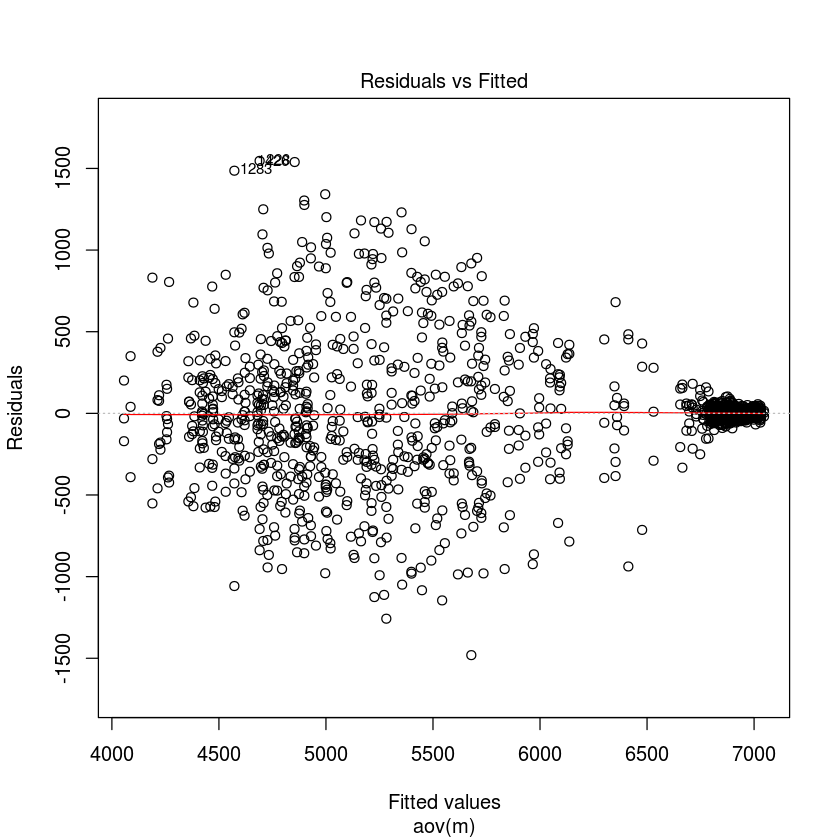

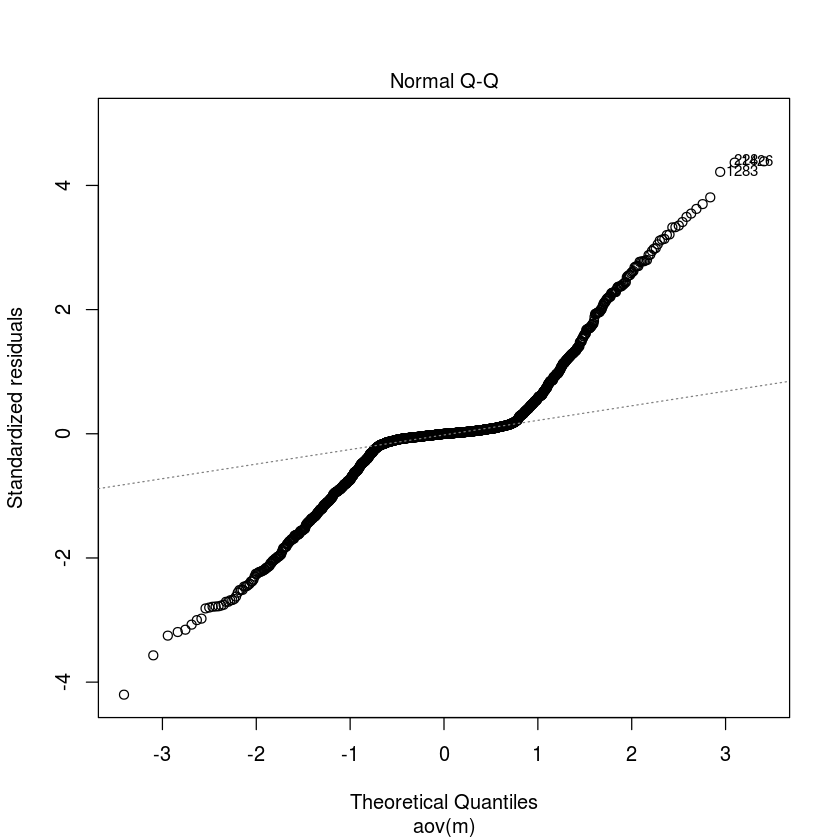

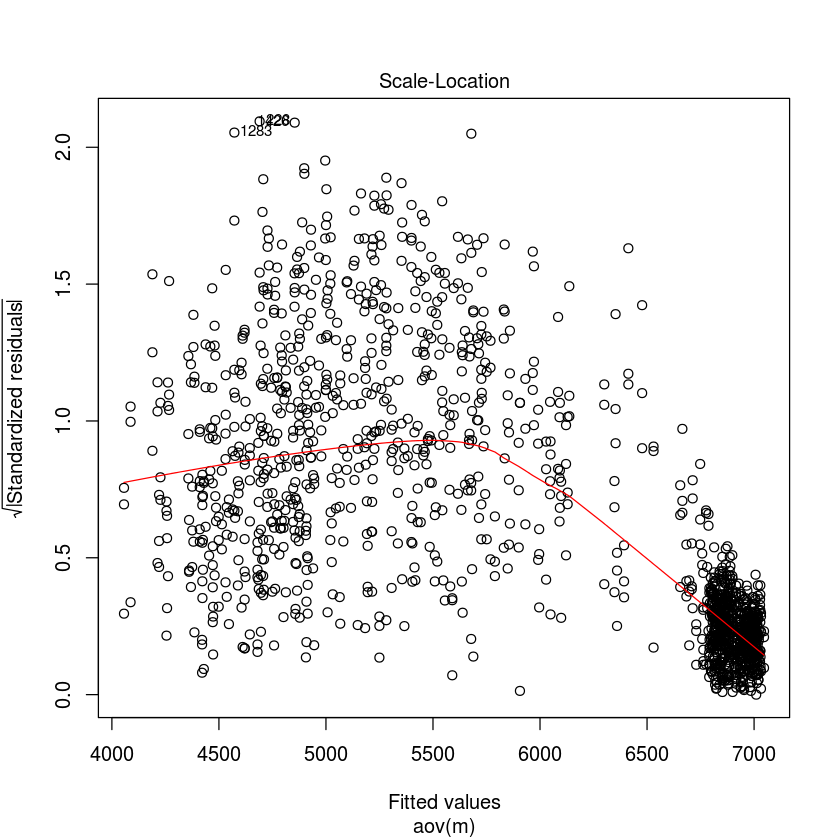

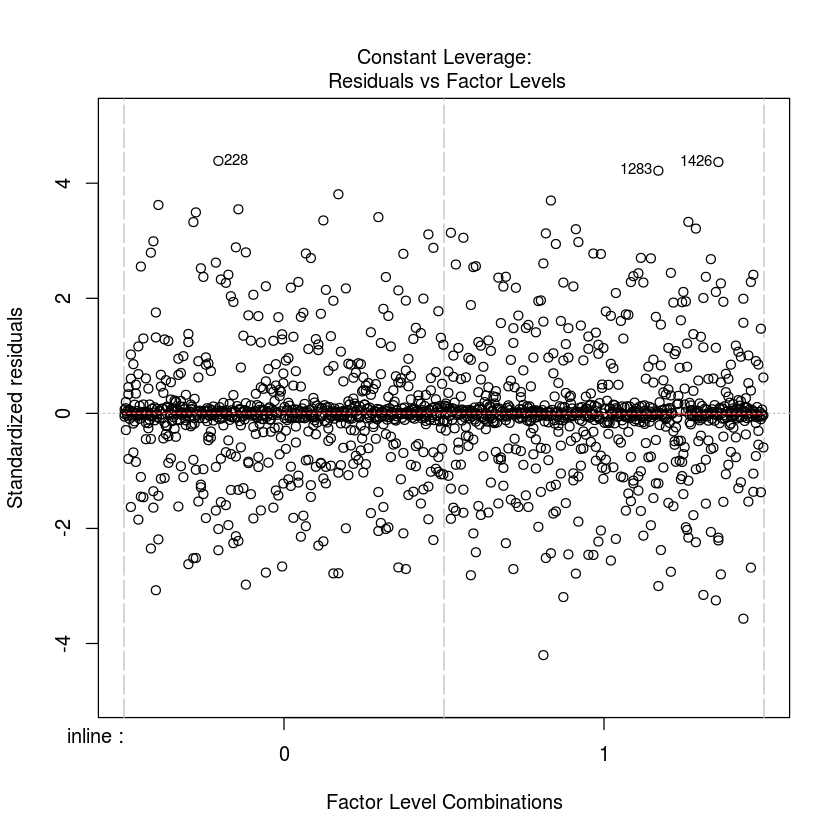

In [35]:
#plot anova stuff
plot(aov(m))

In [36]:
#Read in Data
scale = read.csv('Results2/scale.csv')
colnames(scale) <- c("repl", "inline", "unswitch", "pred_comm", "gcse", "tree_loop",
                    "tree_slp_vec", "vec_cost_mod", "tree_part", "ipa_cp_clone", "bw", "time")

#Make factors categorical
scale$inline = factor(scale$inline)
scale$unswitch = factor(scale$unswitch)
scale$pred_comm = factor(scale$pred_comm)
scale$gcse = factor(scale$gcse)
scale$tree_loop = factor(scale$tree_loop)
scale$tree_slp_vec = factor(scale$tree_slp_vec)
scale$vec_cost_mod = factor(scale$vec_cost_mod)
scale$tree_part = factor(scale$tree_part)
scale$ipa_cp_clone = factor(scale$ipa_cp_clone)

#generate linear model
m2  = lm(bw ~ inline*unswitch*pred_comm*gcse*tree_loop*tree_slp_vec*vec_cost_mod*tree_part*ipa_cp_clone, data=scale)

#report model
summary(m2)

#find percentage variation due to each factor
#anova
anova(m2)
anova_m1 <- anova(m2)

#pct variation
sst = sum(anova(m2)$Sum)
pct_var = anova(m2)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff2 <- data.frame(matrix(pct_var, nrow=1, ncol=512))
colnames(ff2) <- anova_m1$factor
attr(ff2,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
sort(ff2, decreasing = TRUE)

#find confidence interval for factors
confint(aov(m2))


Call:
lm(formula = bw ~ inline * unswitch * pred_comm * gcse * tree_loop * 
    tree_slp_vec * vec_cost_mod * tree_part * ipa_cp_clone, data = scale)

Residuals:
     Min       1Q   Median       3Q      Max 
-1433.70   -65.17    -2.25    53.74  1362.13 

Coefficients:
                                                                                                    Estimate
(Intercept)                                                                                         6727.367
inline1                                                                                              -56.733
unswitch1                                                                                            -64.167
pred_comm1                                                                                           -54.033
gcse1                                                                                               -453.600
tree_loop1                                                                  

Analysis of Variance Table

Response: bw
                                                                                            Df
inline                                                                                       1
unswitch                                                                                     1
pred_comm                                                                                    1
gcse                                                                                         1
tree_loop                                                                                    1
tree_slp_vec                                                                                 1
vec_cost_mod                                                                                 1
tree_part                                                                                    1
ipa_cp_clone                                                                                 1
inline:unswitch                                                                              1
inline:pred_comm                                                                             1
unswitch:pred_comm                                                                           1
inline:gcse                                                                                  1
unswitch:gcse                                                                                1
pred_comm:gcse                                                                               1
inline:tree_loop                                                                             1
unswitch:tree_loop                                                                           1
pred_comm:tree_loop                                                                          1
gcse:tree_loop                                                                               1
inline:tree_slp_vec                                                                          1
unswitch:tree_slp_vec                                                                        1
pred_comm:tree_slp_vec                                                                       1
gcse:tree_slp_vec                                                                            1
tree_loop:tree_slp_vec                                                                       1
inline:vec_cost_mod                                                                          1
unswitch:vec_cost_mod                                                                        1
pred_comm:vec_cost_mod                                                                       1
gcse:vec_cost_mod                                                                            1
tree_loop:vec_cost_mod                                                                       1
tree_slp_vec:vec_cost_mod                                                                    1
inline:tree_part                                                                             1
unswitch:tree_part                                                                           1
pred_comm:tree_part                                                                          1
gcse:tree_part                                                                               1
tree_loop:tree_part                                                                          1
tree_slp_vec:tree_part                                                                       1
vec_cost_mod:tree_part                                                                       1
inline:ipa_cp_clone                                                                          1
unswitch:ipa_cp_clone                                                                        1
pred_comm:ipa_cp_clone                                                                       1
gcse:ipa_cp_clone                                               

[1] "Percentage Variation of residuals"


ipa_cp_clone Residuals     inline inline:tree_loop   tree_loop
1    0.7483687  0.105001 0.01175962      0.009210619 0.007639794
  gcse:tree_loop:tree_slp_vec:tree_part tree_slp_vec:tree_part
1                           0.004429999            0.004381457
  tree_slp_vec:tree_part:ipa_cp_clone
1                         0.004256222
  gcse:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                        0.003990727
  tree_slp_vec:vec_cost_mod:tree_part
1                         0.001917295
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                0.001899254
  gcse:tree_slp_vec:ipa_cp_clone
1                    0.001659527
  unswitch:pred_comm:gcse:tree_loop:vec_cost_mod:tree_part  tree_part
1                                              0.001577098 0.00141667
  pred_comm:vec_cost_mod:tree_part:ipa_cp_clone
1                                   0.001412344
  pred_comm:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone tree_slp_vec
1                                             0.001386178  0.001338914
  tree_slp_vec:vec_cost_mod:ipa_cp_clone pred_comm:vec_cost_mod:tree_part
1                            0.001335666                      0.001266456
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part
1                                   0.001253648
  gcse:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                           0.001241487
  pred_comm:gcse:tree_loop:tree_slp_vec pred_comm:gcse:vec_cost_mod
1                           0.001142084                 0.001132687
  pred_comm:gcse:vec_cost_mod:tree_part
1                           0.001085168
  pred_comm:gcse:tree_slp_vec:tree_part:ipa_cp_clone
1                                        0.001081081
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod
1                                        0.001074223
  pred_comm:tree_loop:ipa_cp_clone pred_comm:vec_cost_mod:ipa_cp_clone
1                      0.001009686                        0.0009946539
  pred_comm:tree_loop pred_comm:gcse:vec_cost_mod:tree_part:ipa_cp_clone
1        0.0009645098                                       0.0009423604
  inline:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                         0.0009181769
  unswitch:pred_comm:tree_slp_vec:ipa_cp_clone tree_loop:vec_cost_mod
1                                 0.0008609962           0.0008602273
  vec_cost_mod gcse:tree_slp_vec:vec_cost_mod:tree_part
1 0.0008272334                             0.0008101163
  pred_comm:tree_loop:vec_cost_mod inline:tree_loop:tree_slp_vec:tree_part
1                     0.0008094936                            0.0008094212
  pred_comm:tree_loop:tree_part tree_slp_vec:ipa_cp_clone
1                  0.0008053865              0.0007942248
  tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                  0.0007930492
  tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                     0.0007581562
  unswitch:tree_slp_vec:ipa_cp_clone
1                       0.0007238565
  unswitch:pred_comm:gcse:tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                                          0.0007103372
  tree_slp_vec:vec_cost_mod
1              0.0006980677
  unswitch:pred_comm:gcse:tree_loop:tree_slp_vec:ipa_cp_clone
1                                                0.0006935034
  inline:tree_loop:ipa_cp_clone unswitch:pred_comm:tree_slp_vec:tree_part
1                   0.000692445                              0.0006756803
  pred_comm:tree_loop:tree_slp_vec:tree_part gcse:tree_part
1                               0.0006669379   0.0006544452
  gcse:tree_loop:tree_slp_vec:vec_cost_mod tree_loop:tree_slp_vec:ipa_cp_clone
1                             0.0006528773                        0.0006343436
  pred_comm:tree_slp_vec unswitch:gcse:tree_loop
1           0.0006332417             0.000622263
  pred_comm:gcse:tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                      

2.5 %
(Intercept)                                                                                          6267.23271
inline1                                                                                              -707.46102
unswitch1                                                                                            -714.89435
pred_comm1                                                                                           -704.76102
gcse1                                                                                               -1104.32769
tree_loop1                                                                                           -614.29435
tree_slp_vec1                                                                                        -678.49435
vec_cost_mod1                                                                                        -694.69435
tree_part1                                                                                           -702.89435
ipa_cp_clone1                                                                                        -693.72769
inline1:unswitch1                                                                                    -892.86792
inline1:pred_comm1                                                                                   -841.00125
unswitch1:pred_comm1                                                                                 -868.03459
inline1:gcse1                                                                                        -477.60125
unswitch1:gcse1                                                                                      -430.13459
pred_comm1:gcse1                                                                                     -444.23459
inline1:tree_loop1                                                                                  -1352.13459
unswitch1:tree_loop1                                                                                 -843.30125
pred_comm1:tree_loop1                                                                                -879.36792
gcse1:tree_loop1                                                                                     -479.70125
inline1:tree_slp_vec1                                                                                -834.30125
unswitch1:tree_slp_vec1                                                                              -866.53459
pred_comm1:tree_slp_vec1                                                                             -917.70125
gcse1:tree_slp_vec1                                                                                  -423.66792
tree_loop1:tree_slp_vec1                                                                             -880.93459
inline1:vec_cost_mod1                                                                                -854.80125
unswitch1:vec_cost_mod1                                                                              -879.20125
pred_comm1:vec_cost_mod1                                                                             -844.76792
gcse1:vec_cost_mod1                                                                                  -507.16792
tree_loop1:vec_cost_mod1                                                                             -881.76792
tree_slp_vec1:vec_cost_mod1                                                                          -866.23459
inline1:tree_part1                                                                                   -830.66792
unswitch1:tree_part1                                                                                 -844.23459
pred_comm1:tree_part1                                                                                -806.80125
gcse1:tree_part1                                                                                     -553.03459
tree_loop1:tree_part1                                                     

In [37]:
#Read in Data
triad = read.csv('Results2/triad.csv')
colnames(triad) <- c("repl", "inline", "unswitch", "pred_comm", "gcse", "tree_loop",
                    "tree_slp_vec", "vec_cost_mod", "tree_part", "ipa_cp_clone", "bw", "time")

#Make factors categorical
triad$inline = factor(triad$inline)
triad$unswitch = factor(triad$unswitch)
triad$pred_comm = factor(triad$pred_comm)
triad$gcse = factor(triad$gcse)
triad$tree_loop = factor(triad$tree_loop)
triad$tree_slp_vec = factor(triad$tree_slp_vec)
triad$vec_cost_mod = factor(triad$vec_cost_mod)
triad$tree_part = factor(triad$tree_part)
triad$ipa_cp_clone = factor(triad$ipa_cp_clone)

#generate linear model
m3  = lm(bw ~ inline*unswitch*pred_comm*gcse*tree_loop*tree_slp_vec*vec_cost_mod*tree_part*ipa_cp_clone, data=triad)
#report model
summary(m3)

#find percentage variation due to each factor
#anova
anova(m3)
anova_m1 <- anova(m3)

#pct variation
sst = sum(anova(m3)$Sum)
pct_var = anova(m3)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff3 <- data.frame(matrix(pct_var, nrow=1, ncol=512))
colnames(ff3) <- anova_m1$factor
attr(ff3,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
sort(ff3, decreasing = TRUE)

#find confidence interval for factors
confint(aov(m3))


Call:
lm(formula = bw ~ inline * unswitch * pred_comm * gcse * tree_loop * 
    tree_slp_vec * vec_cost_mod * tree_part * ipa_cp_clone, data = triad)

Residuals:
     Min       1Q   Median       3Q      Max 
-1530.03   -62.42    -2.23    46.12  1560.73 

Coefficients:
                                                                                                    Estimate
(Intercept)                                                                                         7037.800
inline1                                                                                              -10.433
unswitch1                                                                                            -63.067
pred_comm1                                                                                            11.367
gcse1                                                                                               -600.967
tree_loop1                                                                  

Analysis of Variance Table

Response: bw
                                                                                            Df
inline                                                                                       1
unswitch                                                                                     1
pred_comm                                                                                    1
gcse                                                                                         1
tree_loop                                                                                    1
tree_slp_vec                                                                                 1
vec_cost_mod                                                                                 1
tree_part                                                                                    1
ipa_cp_clone                                                                                 1
inline:unswitch                                                                              1
inline:pred_comm                                                                             1
unswitch:pred_comm                                                                           1
inline:gcse                                                                                  1
unswitch:gcse                                                                                1
pred_comm:gcse                                                                               1
inline:tree_loop                                                                             1
unswitch:tree_loop                                                                           1
pred_comm:tree_loop                                                                          1
gcse:tree_loop                                                                               1
inline:tree_slp_vec                                                                          1
unswitch:tree_slp_vec                                                                        1
pred_comm:tree_slp_vec                                                                       1
gcse:tree_slp_vec                                                                            1
tree_loop:tree_slp_vec                                                                       1
inline:vec_cost_mod                                                                          1
unswitch:vec_cost_mod                                                                        1
pred_comm:vec_cost_mod                                                                       1
gcse:vec_cost_mod                                                                            1
tree_loop:vec_cost_mod                                                                       1
tree_slp_vec:vec_cost_mod                                                                    1
inline:tree_part                                                                             1
unswitch:tree_part                                                                           1
pred_comm:tree_part                                                                          1
gcse:tree_part                                                                               1
tree_loop:tree_part                                                                          1
tree_slp_vec:tree_part                                                                       1
vec_cost_mod:tree_part                                                                       1
inline:ipa_cp_clone                                                                          1
unswitch:ipa_cp_clone                                                                        1
pred_comm:ipa_cp_clone                                                                       1
gcse:ipa_cp_clone                                               

[1] "Percentage Variation of residuals"


ipa_cp_clone  Residuals tree_slp_vec:tree_part:ipa_cp_clone
1    0.8094971 0.08715215                         0.003228501
  tree_slp_vec:tree_part
1            0.002789846
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                0.002494983
  tree_part:ipa_cp_clone gcse:tree_loop:vec_cost_mod tree_slp_vec
1            0.002228268                 0.001938658  0.001923656
  gcse:tree_loop:tree_slp_vec:tree_part
1                           0.001914419
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part gcse:tree_slp_vec:ipa_cp_clone
1                                   0.001865672                    0.001821156
  pred_comm:gcse:tree_loop:vec_cost_mod:ipa_cp_clone
1                                        0.001816726
  gcse:tree_loop:vec_cost_mod:ipa_cp_clone
1                              0.001814334
  pred_comm:gcse:tree_loop:vec_cost_mod
1                           0.001754556
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod
1                                        0.001635703
  gcse:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                        0.001554689
  tree_slp_vec:vec_cost_mod:tree_part tree_slp_vec:ipa_cp_clone
1                         0.001541785               0.001218522
  pred_comm:gcse:vec_cost_mod:tree_part
1                           0.001205335
  pred_comm:gcse:vec_cost_mod:tree_part:ipa_cp_clone
1                                        0.001136089
  tree_loop:vec_cost_mod:tree_part tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                      0.001108915                            0.001090847
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                                                    0.0009939771
  unswitch:pred_comm:tree_loop:ipa_cp_clone gcse:vec_cost_mod
1                                0.00099035      0.0009822508
  inline:unswitch:gcse:tree_loop:tree_slp_vec:ipa_cp_clone
1                                             0.0008830435
  tree_loop:vec_cost_mod inline:tree_loop vec_cost_mod:tree_part
1           0.0008333619     0.0008093743            0.000763749
  inline:unswitch:pred_comm:tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                                            0.0007483664
  gcse:tree_loop:tree_slp_vec:vec_cost_mod gcse:tree_part
1                             0.0007476972    0.000688055
  unswitch:gcse:tree_slp_vec:tree_part
1                         0.0006761757
  unswitch:pred_comm:gcse:tree_loop:tree_slp_vec:ipa_cp_clone
1                                                0.0006586369
  unswitch:pred_comm:gcse:tree_loop:tree_part gcse:tree_slp_vec
1                                0.0006571294       0.000654592
  pred_comm:tree_loop:tree_part gcse:vec_cost_mod:tree_part
1                  0.0006539048                0.0006358967
  unswitch:gcse:tree_slp_vec:vec_cost_mod:tree_part
1                                      0.0006167094
  inline:tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                         0.0006129856
  pred_comm:gcse:tree_loop:tree_slp_vec tree_loop:tree_slp_vec:ipa_cp_clone
1                          0.0006043917                        0.0006021468
  gcse:vec_cost_mod:ipa_cp_clone
1                   0.0005841867
  tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                     0.0005756194
  inline:unswitch:pred_comm:tree_loop:vec_cost_mod:tree_part
1                                               0.0005656481
  inline:gcse:tree_part inline:tree_loop:vec_cost_mod:tree_part
1           0.000560167                            0.0005520094
  unswitch:gcse:tree_loop:tree_slp_vec:ipa_cp_clone pred_comm:gcse
1                                      0.0005506857   0.0005492623
  unswitch:pred_comm:gcse:tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                                                   0.0005430113
  unswitch:tree_loop:vec_cost_mod:tree_part:ipa_cp_clone
1                                           0.0005339817
  pred_com

2.5 %
(Intercept)                                                                                          6593.141095
inline1                                                                                              -639.275988
unswitch1                                                                                            -691.909321
pred_comm1                                                                                           -617.475988
gcse1                                                                                               -1229.809321
tree_loop1                                                                                           -580.075988
tree_slp_vec1                                                                                        -655.442655
vec_cost_mod1                                                                                        -703.009321
tree_part1                                                                                           -657.309321
ipa_cp_clone1                                                                                        -670.509321
inline1:unswitch1                                                                                    -864.751144
inline1:pred_comm1                                                                                   -839.284477
unswitch1:pred_comm1                                                                                 -900.317811
inline1:gcse1                                                                                        -310.484477
unswitch1:gcse1                                                                                      -232.084477
pred_comm1:gcse1                                                                                     -359.384477
inline1:tree_loop1                                                                                   -981.351144
unswitch1:tree_loop1                                                                                 -892.917811
pred_comm1:tree_loop1                                                                                -974.084477
gcse1:tree_loop1                                                                                     -363.917811
inline1:tree_slp_vec1                                                                                -855.417811
unswitch1:tree_slp_vec1                                                                              -873.251144
pred_comm1:tree_slp_vec1                                                                             -974.284477
gcse1:tree_slp_vec1                                                                                  -378.417811
tree_loop1:tree_slp_vec1                                                                             -906.117811
inline1:vec_cost_mod1                                                                                -795.117811
unswitch1:vec_cost_mod1                                                                              -775.417811
pred_comm1:vec_cost_mod1                                                                             -885.551144
gcse1:vec_cost_mod1                                                                                  -280.984477
tree_loop1:vec_cost_mod1                                                                             -810.284477
tree_slp_vec1:vec_cost_mod1                                                                          -821.184477
inline1:tree_part1                                                                                   -858.284477
unswitch1:tree_part1                                                                                 -838.017811
pred_comm1:tree_part1                                                                                -887.684477
gcse1:tree_part1                                                                                     -280.084477
tree_loop1:tree_part1                  

In [38]:
#Read in Data
add = read.csv('Results2/add.csv')
colnames(add) <- c("repl", "inline", "unswitch", "pred_comm", "gcse", "tree_loop",
                    "tree_slp_vec", "vec_cost_mod", "tree_part", "ipa_cp_clone", "bw", "time")

#Make factors categorical
add$inline = factor(add$inline)
add$unswitch = factor(add$unswitch)
add$pred_comm = factor(add$pred_comm)
add$gcse = factor(add$gcse)
add$tree_loop = factor(add$tree_loop)
add$tree_slp_vec = factor(add$tree_slp_vec)
add$vec_cost_mod = factor(add$vec_cost_mod)
add$tree_part = factor(add$tree_part)
add$ipa_cp_clone = factor(add$ipa_cp_clone)

#generate linear model
m4  = lm(bw ~ inline*unswitch*pred_comm*gcse*tree_loop*tree_slp_vec*vec_cost_mod*tree_part*ipa_cp_clone, data=add)

#report model
summary(m4)

#find percentage variation due to each factor
#anova
anova(m4)
anova_m1 <- anova(m4)

#pct variation
sst = sum(anova(m4)$Sum)
pct_var = anova(m4)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff4 <- data.frame(matrix(pct_var, nrow=1, ncol=512))
colnames(ff4) <- anova_m1$factor
attr(ff4,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
sort(ff4, decreasing = TRUE)

#find confidence interval for factors
confint(aov(m4))


Call:
lm(formula = bw ~ inline * unswitch * pred_comm * gcse * tree_loop * 
    tree_slp_vec * vec_cost_mod * tree_part * ipa_cp_clone, data = add)

Residuals:
     Min       1Q   Median       3Q      Max 
-1509.57   -65.24    -0.42    49.17  1331.90 

Coefficients:
                                                                                                    Estimate
(Intercept)                                                                                         7040.900
inline1                                                                                               14.300
unswitch1                                                                                              1.300
pred_comm1                                                                                            13.500
gcse1                                                                                               -518.767
tree_loop1                                                                    

Analysis of Variance Table

Response: bw
                                                                                            Df
inline                                                                                       1
unswitch                                                                                     1
pred_comm                                                                                    1
gcse                                                                                         1
tree_loop                                                                                    1
tree_slp_vec                                                                                 1
vec_cost_mod                                                                                 1
tree_part                                                                                    1
ipa_cp_clone                                                                                 1
inline:unswitch                                                                              1
inline:pred_comm                                                                             1
unswitch:pred_comm                                                                           1
inline:gcse                                                                                  1
unswitch:gcse                                                                                1
pred_comm:gcse                                                                               1
inline:tree_loop                                                                             1
unswitch:tree_loop                                                                           1
pred_comm:tree_loop                                                                          1
gcse:tree_loop                                                                               1
inline:tree_slp_vec                                                                          1
unswitch:tree_slp_vec                                                                        1
pred_comm:tree_slp_vec                                                                       1
gcse:tree_slp_vec                                                                            1
tree_loop:tree_slp_vec                                                                       1
inline:vec_cost_mod                                                                          1
unswitch:vec_cost_mod                                                                        1
pred_comm:vec_cost_mod                                                                       1
gcse:vec_cost_mod                                                                            1
tree_loop:vec_cost_mod                                                                       1
tree_slp_vec:vec_cost_mod                                                                    1
inline:tree_part                                                                             1
unswitch:tree_part                                                                           1
pred_comm:tree_part                                                                          1
gcse:tree_part                                                                               1
tree_loop:tree_part                                                                          1
tree_slp_vec:tree_part                                                                       1
vec_cost_mod:tree_part                                                                       1
inline:ipa_cp_clone                                                                          1
unswitch:ipa_cp_clone                                                                        1
pred_comm:ipa_cp_clone                                                                       1
gcse:ipa_cp_clone                                               

[1] "Percentage Variation of residuals"


ipa_cp_clone  Residuals tree_slp_vec:tree_part
1    0.8209802 0.07327957            0.003649881
  tree_slp_vec:tree_part:ipa_cp_clone tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                          0.00357357                            0.002433371
  tree_loop:tree_slp_vec:ipa_cp_clone
1                         0.001843437
  tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                0.001778648
  tree_part:ipa_cp_clone gcse:tree_slp_vec:ipa_cp_clone
1              0.0016145                    0.001613448
  gcse:tree_loop:tree_slp_vec:tree_part tree_slp_vec:vec_cost_mod:tree_part
1                           0.001557199                         0.001549175
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod tree_slp_vec:vec_cost_mod
1                                        0.001370561               0.001316728
  tree_loop:vec_cost_mod:tree_part
1                      0.001300963
  gcse:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                        0.001236726
  pred_comm:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                             0.001160228
  gcse:tree_loop:tree_slp_vec:vec_cost_mod tree_slp_vec
1                              0.001107008  0.001093868
  gcse:tree_loop:vec_cost_mod tree_loop:tree_slp_vec:vec_cost_mod:tree_part
1                 0.001084011                                     0.0010469
  gcse:tree_loop:vec_cost_mod:ipa_cp_clone gcse:tree_part
1                              0.001024267    0.000972689
  gcse:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone    tree_loop
1                                          0.0009537097 0.0008801805
  unswitch:tree_loop:tree_slp_vec:tree_part:ipa_cp_clone
1                                           0.0008632812
  unswitch:tree_loop:tree_slp_vec:tree_part
1                              0.0008595972
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod:tree_part:ipa_cp_clone
1                                                              0.0008568532
  tree_loop:vec_cost_mod gcse:tree_part:ipa_cp_clone
1           0.0008555277                0.0008399822
  pred_comm:gcse:vec_cost_mod:tree_part:ipa_cp_clone
1                                       0.0008300148
  pred_comm:gcse:tree_loop:tree_slp_vec:vec_cost_mod:tree_part
1                                                 0.0007973954
  pred_comm:tree_loop:vec_cost_mod
1                     0.0007786589
  inline:pred_comm:tree_loop:tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                                                      0.0007649338
  pred_comm:tree_loop:tree_part pred_comm:vec_cost_mod:ipa_cp_clone
1                  0.0007641184                        0.0007538939
  inline:gcse:tree_loop:tree_slp_vec:vec_cost_mod
1                                    0.0007503158
  pred_comm:gcse:vec_cost_mod:tree_part
1                          0.0007263081
  pred_comm:gcse:tree_loop:tree_slp_vec:tree_part
1                                    0.0007026721
  gcse:tree_slp_vec:tree_part:ipa_cp_clone inline:gcse:tree_loop
1                             0.0006913419          0.0006908829
  gcse:tree_loop:tree_slp_vec:vec_cost_mod:ipa_cp_clone
1                                          0.0006858627
  inline:tree_loop:tree_slp_vec:ipa_cp_clone
1                               0.0006805468
  unswitch:pred_comm:gcse:ipa_cp_clone
1                         0.0006694764
  unswitch:pred_comm:tree_slp_vec:ipa_cp_clone tree_slp_vec:ipa_cp_clone
1                                  0.000656446              0.0006547425
  gcse:vec_cost_mod pred_comm:gcse:vec_cost_mod
1      0.0006535597                0.0006514564
  inline:gcse:tree_loop:tree_slp_vec:ipa_cp_clone
1                                    0.0006135563
  inline:gcse:tree_loop:tree_slp_vec pred_comm:tree_loop:tree_slp_vec:tree_part
1                       0.0006106494                               0.0006039978
  tree_loop:tree_part unswitch:gcse:tree_slp_vec
1         0.000597521               0.0005886

2.5 %
(Intercept)                                                                                          6626.31339
inline1                                                                                              -572.01401
unswitch1                                                                                            -585.01401
pred_comm1                                                                                           -572.81401
gcse1                                                                                               -1105.08068
tree_loop1                                                                                           -589.11401
tree_slp_vec1                                                                                        -578.78068
vec_cost_mod1                                                                                        -619.84734
tree_part1                                                                                           -587.01401
ipa_cp_clone1                                                                                        -574.48068
inline1:unswitch1                                                                                    -841.57323
inline1:pred_comm1                                                                                   -840.73989
unswitch1:pred_comm1                                                                                 -874.60656
inline1:gcse1                                                                                        -359.23989
unswitch1:gcse1                                                                                      -361.73989
pred_comm1:gcse1                                                                                     -367.53989
inline1:tree_loop1                                                                                   -910.07323
unswitch1:tree_loop1                                                                                 -894.90656
pred_comm1:tree_loop1                                                                                -871.77323
gcse1:tree_loop1                                                                                     -318.40656
inline1:tree_slp_vec1                                                                                -857.13989
unswitch1:tree_slp_vec1                                                                              -871.43989
pred_comm1:tree_slp_vec1                                                                             -883.23989
gcse1:tree_slp_vec1                                                                                  -289.30656
tree_loop1:tree_slp_vec1                                                                             -871.63989
inline1:vec_cost_mod1                                                                                -856.77323
unswitch1:vec_cost_mod1                                                                              -793.10656
pred_comm1:vec_cost_mod1                                                                             -844.30656
gcse1:vec_cost_mod1                                                                                  -255.73989
tree_loop1:vec_cost_mod1                                                                             -816.80656
tree_slp_vec1:vec_cost_mod1                                                                          -767.57323
inline1:tree_part1                                                                                   -864.80656
unswitch1:tree_part1                                                                                 -831.47323
pred_comm1:tree_part1                                                                                -857.60656
gcse1:tree_part1                                                                                     -381.40656
tree_loop1:tree_part1                                                     

In [39]:
#combine and summarize data

#variation due to factors
total <- rbind(ff, ff2, ff3, ff4)
#avg <- c(mean(total$opt), mean(total$bits), mean(total$prec),
#         mean(total$'opt:bits'), mean(total$'opt:prec'), mean(total$'bits:prec'),
#         mean(total$'opt:bits:prec'), mean(total$Residuals))
#total2 <- rbind(total, avg)
#row.names(total2) <- c("copy", "scale", "triad", "add", "Average")
#total2